### Проект: e-learning <h3>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import requests 
from urllib.parse import urlencode

import matplotlib.pyplot as plt

_Загрузим данные об оценках в тесте с Яндекс диска_

In [2]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в датафрейм assessments
download_response = requests.get(download_url) 
assessments = pd.read_csv(download_url)

assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


В датасете __assessments__ имеются следующие данные об оценках в тесте:

- __code_module__ — идентификационный код предмета.

- __code_presentation__ — семестр (идентификационный код).

- __id_assessment__ — тест (идентификационный номер ассессмента).

- __assessment_type__ — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

- __date__ — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

- __weight__ — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

_Загрузим список предметов по семестрам_

In [3]:
# используем api, зададим новый public key
public_key = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в датафрейм courses
download_response = requests.get(download_url) 
courses = pd.read_csv(download_url)

courses.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Датасет __courses__ содержит список предметов по семестрам.
- __code_module__ — предмет (идентификационный код).

- __code_presentation__ — семестр (идентификационный код).

- __module_presentation_length__ — продолжительность семестра в днях.

_Загрузим данные о результатах тестов студентов_

In [4]:
# используем api, зададим новый public key
public_key = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в датафрейм student_assessment
download_response = requests.get(download_url) 
student_assessment = pd.read_csv(download_url)

student_assessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Датасет __student_assessment__ содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
- __id_assessment__ — тест (идентификационный номер).

- __id_student__ — идентификационный номер студента.

- __date_submitted__ — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

- __is_banked__ — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

- __score__ — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

_Загрузим данные о времени, когда студент зарегистрировался для прохождения курса в семестре_

In [5]:
# используем api, зададим новый public key
public_key = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в датафрейм student_registration
download_response = requests.get(download_url) 
student_registration = pd.read_csv(download_url)

student_registration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Датасет __student_registration__ содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
- __code_module__ — предмет (идентификационный код).

- __code_presentation__ — семестр (идентификационный код)

- __id_student__ — идентификационный номер студента.

- __date_registration__ — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

- __date_unregistration__ — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

#### Задача: посчитать количество студентов, успешно сдавших только один курс <h4>
Сколько студентов успешно сдали только один курс?

Успешная сдача — это зачёт по курсу на экзамене

_Посмотрим какие есть экзамены_

In [6]:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


_Здесь мы видим, что в предмете CCC по два экзамена в каждом семестре. В то время как во всех остальных предметах - один экзамен в семестр._

_Сделаем проверку по датасету student_assessment, есть ли там тоже двойные экзамены. Выведем строки с тестами 24290, 40087, 24299 и 40088._

In [7]:
ccc_exam_check = student_assessment \
.query('id_assessment == 24290 or id_assessment == 40087 or id_assessment == 24299 or id_assessment == 40088')

ccc_exam_check.id_assessment.unique()

array([24290, 24299])

_Таким образом, в данных student_assessment нет экзаменов с номерами 40087 и 40088. То есть получается, мы исходим из того, что в каждом семестре по предмету не более одного экзамена._

Вернемся к первоначальному вопросу: Сколько студентов успешно сдали только один курс?

    
Успешная сдача — это зачёт по курсу на экзамене

Нам известно, что оценка 40 и выше означает успешную сдачу теста. Отберем успешно сданные экзамены.

Для этого сначала объединим данные о результатах тестах студентов с данными об оценках в тесте. И из получившегося датафрейма выберем нужные нам данные.

In [8]:
student_assessment_exams = student_assessment.merge(assessments, 
                                                    how='left', 
                                                    on='id_assessment')
student_assessment_exams.head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [9]:
students_passed_one_exam = student_assessment_exams \
    .query('score >= 40 and assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'exams_passed'}) \
    .query('exams_passed == 1')

students_passed_one_exam.head(5)

,id_student,exams_passed
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


Датафрейм students_passed_one_exam содержит id студентов, сдавших всего один экзамен. Узнаем конкретное число:

In [10]:
number_of_students_passed_one_exam = len(students_passed_one_exam.index)

print('{} students have passed only one exam.'.format(number_of_students_passed_one_exam))

3802 students have passed only one exam.


#### Задача: ранжировать курсы по завершаемости <h4>
Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. 
    
__завершаемость__ = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

_Сначала найдем количество всех попыток сдать экзамен_

In [11]:
exam_attempts = student_assessment_exams \
    .query('assessment_type == "Exam"') \
    .groupby('id_assessment', as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'all_exam_attempts'})

exam_attempts

,id_assessment,all_exam_attempts
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


_Затем найдем количество всех успешных попыток сдать экзамен_

In [12]:
successful_exam = student_assessment_exams \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby('id_assessment', as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'successful_exam_attempts'})

successful_exam

,id_assessment,successful_exam_attempts
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


_Объединим получившиеся таблицы по идентификационному номеру ассессмента (id_assessment)_

In [13]:
exam_completion = exam_attempts.merge(successful_exam, how='left', on='id_assessment')
exam_completion

,id_assessment,all_exam_attempts,successful_exam_attempts
0,24290,747,664
1,24299,1168,1019
2,25340,602,504
3,25354,968,878
4,25361,524,485
5,25368,950,842


_Вычислим завершаемость._
1. Создадим отдельный столбец в датафрейме со значением завершаемости.
2. Отсортируем завершаемость по возрастанию.
3. Присоединим данные о предметах к получившемуся датафрейму.

In [14]:
exam_completion['completion'] = exam_completion.successful_exam_attempts / exam_completion.all_exam_attempts
exam_completion = exam_completion.sort_values(by='completion') \
                                 .merge(assessments, how='left', on='id_assessment')
exam_completion

,id_assessment,all_exam_attempts,successful_exam_attempts,completion,code_module,code_presentation,assessment_type,date,weight
0,25340,602,504,0.837209,DDD,2013B,Exam,240.0,100.0
1,24299,1168,1019,0.872432,CCC,2014J,Exam,NaN,100.0
2,25368,950,842,0.886316,DDD,2014J,Exam,NaN,100.0
3,24290,747,664,0.888889,CCC,2014B,Exam,NaN,100.0
4,25354,968,878,0.907025,DDD,2013J,Exam,261.0,100.0
5,25361,524,485,0.925573,DDD,2014B,Exam,241.0,100.0


In [15]:
toughest_exam = exam_completion.iloc[0]['id_assessment']

print('#{} assessment is the toughest exam.'.format(toughest_exam))

#25340 assessment is the toughest exam.


In [16]:
easiest_exam = exam_completion.iloc[5]['id_assessment']

print('#{} assessment is the easiest exam.'.format(easiest_exam))

#25361 assessment is the easiest exam.


Таким образом, самый сложный экзамен id_assessment = 25340, в рамках предмета DDD.
Самый простой экзамен, также в рамках предмета DDD, id_assessment = 25361.

#### Задача: определить средний срок сдачи экзаменов по каждому предмету <h4>
По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

_Объединим датафрейм student_assessment_exams (там уже смердженные данные о результатах тестах студентов с данными об оценках в тесте) с данными о предметах по семестрам_

In [17]:
student_assessment_full = student_assessment_exams.merge(courses, 
                                                         how='left', 
                                                         on=['code_module', 
                                                             'code_presentation'])

student_assessment_full.head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268


_Отсортируем данные об успешно сданных экзаменах (score не меньше 40) и узнаем средний срок сдачи._

In [18]:
student_assessment_full \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby('code_module', as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'mean_date_submitted'})

,code_module,mean_date_submitted
0,CCC,239.345217
1,DDD,237.976006


_Проверим, есть ли данные о сдаче экзаменов по другим предметам_

In [19]:
student_assessment_full \
    .query('assessment_type == "Exam"') \
    .code_module.unique()

array(['CCC', 'DDD'], dtype=object)

_Данные есть только по экзаменам в двух курсах: CCC и DDD. Тут ошибки найти не удалось._

_Проверим были ли студенты, пересдававшие уже успешно сданный экзамен (например, пытаясь сдать на более высокий балл)_

In [20]:
student_assessment_full \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby(['id_student', 'code_module'], as_index=False) \
    .agg({'date_submitted': 'max'}) \
    .groupby('code_module', as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'mean_date_submitted'})

,code_module,mean_date_submitted
0,CCC,239.345217
1,DDD,237.978566


Судя по тому, что результат по предмету DDD немного отличается в большую сторону от предыдущего. Вероятно имело место быть какое-то небольшое количество пересдач уже успешно сданного экзамена.

Таким образом, средний срок сдачи экзаменов:
- по предмету CCC - 239 дней, 
- а по предмету DDD - 238 дней.

_(количество дней указано с начала семестра, значения округлены до целого)_

_Посмотрим продолжительность модулей по этим предметам_

In [21]:
courses.query('code_module == "CCC" | code_module == "DDD"')

,code_module,code_presentation,module_presentation_length
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262
10,DDD,2013B,240
11,DDD,2014B,241


Продолжительность модулей больше, чем средний срок сдачи.

А какая указана дата сдачи экзамена? Все ли сдают в срок?

In [22]:
assessments \
    .query('code_module == "CCC" | code_module == "DDD"') \
    .query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


Не все даты экзаменов нам известны.

In [23]:
exam_completion

,id_assessment,all_exam_attempts,successful_exam_attempts,completion,code_module,code_presentation,assessment_type,date,weight
0,25340,602,504,0.837209,DDD,2013B,Exam,240.0,100.0
1,24299,1168,1019,0.872432,CCC,2014J,Exam,NaN,100.0
2,25368,950,842,0.886316,DDD,2014J,Exam,NaN,100.0
3,24290,747,664,0.888889,CCC,2014B,Exam,NaN,100.0
4,25354,968,878,0.907025,DDD,2013J,Exam,261.0,100.0
5,25361,524,485,0.925573,DDD,2014B,Exam,241.0,100.0


Судя по всему, в student_assessment.csv представлены данные о сдаче экзаменов по предметам CCC и DDD. 

Как выяснили ранее, разные семестры не связаны между собой (например это как разные потоки в karpov courses), и тогда вычисления, сделанные выше, остаются корректными. То есть сдача экзамена в модуле = успешное завершение курса.

Таким образом, средний срок сдачи экзаменов:
- по предмету __CCC - 239 дней__, 
- а по предмету __DDD - 238 дней__.

#### Задача: определить ТОП-3 предметов по популярности и по оттоку <h4>
Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

_Посчитаем количество уникальных регистраций на каждом предмете_

In [24]:
registration_courses = student_registration \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': 'number_of_registrations'}) \
    .sort_values('number_of_registrations', ascending=False)

registration_courses

,code_module,number_of_registrations
1,BBB,7692
5,FFF,7397
3,DDD,5848
2,CCC,4251
4,EEE,2859
6,GGG,2525
0,AAA,712


_Выведем ТОП-3 предметов по количеству регистраций_

In [25]:
top_registrations = registration_courses.head(3)
top_registrations

,code_module,number_of_registrations
1,BBB,7692
5,FFF,7397
3,DDD,5848


_Посчитаем отток студентов на каждом предмете_

In [26]:
unregistration_courses = student_registration \
    .dropna(subset=['date_unregistration']) \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .rename(columns={'id_student': 'number_of_unregistrations'}) \
    .sort_values('number_of_unregistrations', ascending=False)

unregistration_courses

,code_module,number_of_unregistrations
1,BBB,2314
5,FFF,2249
3,DDD,2065
2,CCC,1858
4,EEE,693
6,GGG,287
0,AAA,116


_Выведем ТОП-3 предметов по оттоку студентов_

In [27]:
top_unregistration_courses = unregistration_courses.head(3)
top_unregistration_courses

,code_module,number_of_unregistrations
1,BBB,2314
5,FFF,2249
3,DDD,2065


И тут мы видим те же курсы, что и в топе по регистрациям.

#### Задача: выявить семестр с самой низкой завершаемостью и долгими средними сроками сдачи курсов <h4>
Используя pandas, в период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Чтобы узнать завершаемость и средние сроки сдачи курса, нам нужно знать следующие параметры:
- общее количество попыток сдать экзамен
- количество успешных попыток сдать экзамен
- средний срок успешной сдачи экзамена (выше описано, что в наших данных на курсе по предмету один экзамен) 

_Узнаем общее количество попыток сдать экзамен по семестрам_

In [28]:
total_exam_attempts_by_module = student_assessment_full \
    .query('assessment_type == "Exam"') \
    .groupby(['code_presentation'], as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'total_exam_attempts'})

total_exam_attempts_by_module

,code_presentation,total_exam_attempts
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


_Узнаем количество успешных попыток сдать экзамен по семестрам_

In [29]:
successful_exam_attempts_by_module = student_assessment_full \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby(['code_presentation'], as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'successful_exam_attempts'})

successful_exam_attempts_by_module

,code_presentation,successful_exam_attempts
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


_Узнаем средний срок успешной сдачи экзаменов по семестрам_

In [30]:
successful_exam_time_by_module = student_assessment_full \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby(['id_student', 'code_presentation'], as_index=False) \
    .agg({'date_submitted': 'max'}) \
    .groupby(['code_presentation'], as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'mean_exam_pass_time'})

successful_exam_time_by_module

,code_presentation,mean_exam_pass_time
0,2013B,230.164683
1,2013J,239.509112
2,2014B,233.007018
3,2014J,243.707277


_Объединим полученные данные в один датафрейм_

In [31]:
exam_data = total_exam_attempts_by_module.merge(successful_exam_attempts_by_module, 
                                                how='left', 
                                                on=['code_presentation'])
exam_data = exam_data.merge(successful_exam_time_by_module, 
                            how='left', 
                            on=['code_presentation'])
exam_data

,code_presentation,total_exam_attempts,successful_exam_attempts,mean_exam_pass_time
0,2013B,602,504,230.164683
1,2013J,968,878,239.509112
2,2014B,1271,1149,233.007018
3,2014J,2118,1861,243.707277


_Узнаем завершаемость_

__завершаемость__ = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [32]:
exam_data['completion'] = exam_data.successful_exam_attempts / exam_data.total_exam_attempts
exam_data = exam_data.sort_values(by='completion')
exam_data

,code_presentation,total_exam_attempts,successful_exam_attempts,mean_exam_pass_time,completion
0,2013B,602,504,230.164683,0.837209
3,2014J,2118,1861,243.707277,0.878659
2,2014B,1271,1149,233.007018,0.904013
1,2013J,968,878,239.509112,0.907025


Таким образом, семестр с самой низкой завершаемостью - 2013B.

In [33]:
exam_data.sort_values(by='mean_exam_pass_time', ascending=False)

,code_presentation,total_exam_attempts,successful_exam_attempts,mean_exam_pass_time,completion
3,2014J,2118,1861,243.707277,0.878659
1,2013J,968,878,239.509112,0.907025
2,2014B,1271,1149,233.007018,0.904013
0,2013B,602,504,230.164683,0.837209


Семестр с самыми долгими средними сроками прохождения курса - 2014J.

#### Задача: построить адаптированные RFM-кластеры студентов <h4>
Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, необходимо построить адаптированные RFM-кластеры студентов, чтобы качественно оценить аудиторию. 
    
Выберем следующие метрики: 
    - R - среднее время сдачи одного экзамена, 
    - F - завершаемость курсов, 
    - M - среднее количество баллов, получаемое за экзамен. 
    
Необходимо описать, путь создания кластеров. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Для решения задачи необходимо провести предварительное исследование данных и сформулировать, что должно считаться курсом. Обосновать свой выбор можно с помощью фактов сдачи экзаменов, распределения студентов и уникального идентефикатора курса.

Как выяснили ранее, разные семестры не связаны между собой (например это как разные потоки в karpov courses). То есть сдача экзамена в модуле = успешное завершение курса.


In [34]:
student_assessment_full.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,268
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,268
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,268
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,268


- Recency - среднее время сдачи одного экзамена студентом.

In [35]:
r_table = student_assessment_full.query('assessment_type == "Exam" and score >= 40') \
                                 .groupby('id_student', as_index=False) \
                                 .agg({'date_submitted': 'mean'}) \
                                 .rename(columns={'date_submitted': 'recency'})
r_table.head()

,id_student,recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


- Frequency - завершаемость курсов студентом.

__завершаемость__ = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Рассчитаем все попытки сдать экзамен студентом:

In [36]:
exam_attempts_by_student = student_assessment_full \
    .query('assessment_type == "Exam"') \
    .groupby('id_student', as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'all_exam_attempts'})
exam_attempts_by_student.head()

,id_student,all_exam_attempts
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


Узнаем количество успешных попыток сдать экзамен:

In [37]:
successful_exam_attempts_by_student = student_assessment_full \
    .query('assessment_type == "Exam"') \
    .query('score >= 40') \
    .groupby('id_student', as_index=False) \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'successful_exam_attempts'})
successful_exam_attempts_by_student.head()

,id_student,successful_exam_attempts
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


Объединим получившиеся датафреймы:

In [38]:
f_table = exam_attempts_by_student.merge(successful_exam_attempts_by_student,
                                         how='left',
                                         on='id_student')

Рассчитаем завершаемость (в нашем случае она и станет frequency):

In [39]:
f_table['frequency'] = f_table.successful_exam_attempts / f_table.all_exam_attempts
f_table.head()

,id_student,all_exam_attempts,successful_exam_attempts,frequency
0,23698,1,1.0,1.0
1,24213,1,1.0,1.0
2,27116,1,1.0,1.0
3,28046,1,1.0,1.0
4,28787,1,1.0,1.0


- Monetary Value - среднее количество баллов, получаемое студентом за экзамен. 

In [40]:
m_table = student_assessment_full.query('assessment_type == "Exam"') \
                                 .groupby('id_student', as_index=False) \
                                 .agg({'score': 'mean'}) \
                                 .rename(columns={'score': 'monetary_value'})
m_table.head()

,id_student,monetary_value
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0


Объединим получившиеся данные в общий датафрейм.

In [41]:
rfm_table = m_table.merge(f_table, how='left', on='id_student') \
                   .merge(r_table, how='left', on='id_student')
cols = [2, 3]
rfm_table.drop(rfm_table.columns[cols], axis=1, inplace=True)  # уберем лишние столбцы
rfm_table.head()

,id_student,monetary_value,frequency,recency
0,23698,80.0,1.0,243.0
1,24213,58.0,1.0,236.0
2,27116,96.0,1.0,243.0
3,28046,40.0,1.0,237.0
4,28787,44.0,1.0,243.0


Проверим, есть ли пропущенные значения

In [42]:
rfm_table.isna().sum()

id_student          0
monetary_value      0
frequency         536
recency           536
dtype: int64

Все пропущенные значения - в столбцах frequency и recency. Это завершаемость и среднее время сдачи одного экзамена студентом соответственно. Заполним пропущенные значения во frequency нулями, так как пропущенное значение будет соответствовать нулю в завершаемости. А пропущенные значения в recency оставим как есть.

In [43]:
rfm_table['frequency'] = rfm_table['frequency'].fillna(0)

Для расчета RFM используем квантили

In [44]:
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quantiles.drop(quantiles.columns[0], axis=1, inplace=True)  # уберем лишний столбец с id студентов
quantiles

,monetary_value,frequency,recency
0.25,50.0,1.0,234.0
0.50,66.0,1.0,241.0
0.75,82.0,1.0,243.0


In [45]:
rfm_table.describe()

,id_student,monetary_value,frequency,recency
count,4.633000e+03,4633.000000,4633.000000,4097.000000
mean,7.256904e+05,65.117958,0.881286,238.466317
std,5.753498e+05,20.470561,0.321142,5.632457
min,2.369800e+04,0.000000,0.000000,229.000000
25%,5.011580e+05,50.000000,1.000000,234.000000
50%,5.884820e+05,66.000000,1.000000,241.000000
75%,6.463510e+05,82.000000,1.000000,243.000000
max,2.698251e+06,100.000000,1.000000,285.000000


Пропущенные значения recency заполним значениями 500 (больше максимального значения в этом столбце) - это те, кто экзамен не сдал, они должны попасть в отдельную группу в сегментации.

In [46]:
rfm_table['recency'] = rfm_table['recency'].fillna(500)

Так как у frequency одно и то же значение в каждом квантили, для него используем другой метод. 

Для начала посмотрим, какие вообще есть значения в этом столбце.

In [47]:
rfm_table['frequency'].value_counts()

1.0    4069
0.0     536
0.5      28
Name: frequency, dtype: int64

Зададим новый столбец в датафрейме quantiles со значениями frequency 1, 0.5 и 0

In [48]:
quantiles['frequency'] = [1.0, 0.5, 0.0]
quantiles

,monetary_value,frequency,recency
0.25,50.0,1.0,234.0
0.50,66.0,0.5,241.0
0.75,82.0,0.0,243.0


В группах recency, frequency и monetary определим категории:
- recency: не сдавишие (4 - значение 500), сдавшие позже других (3 - значения > 243, но < 500), сдавшие во время (2 - значения между 234 и 243), сдавшие раньше других (1 - значения < 234)
- frequency: не сдавшие курсы (3 - значение 0), сдавшие часть курсов (2 - значение 0.5), сдавшие все курсы (1 - значение 1)
- monetary: неуд (4 - значения < 40), удовлетворительно (3 - значения от 40 до 66), хорошо (2 - значения между 66 и 82), отлично (1 - значения > 82)

Внесем это в таблицу quantiles

In [49]:
quantiles['recency'] = [500, 243, 234]
quantiles['monetary_value'] = [40, 66, 82]
quantiles

,monetary_value,frequency,recency
0.25,40,1.0,500
0.50,66,0.5,243
0.75,82,0.0,234


Создадим функции, которые сегментируют студентов:

In [50]:
def RClass(value, parameter_name, quantiles_table):
    if value == quantiles_table[parameter_name][0.25]:
        return 4
    elif value >= quantiles_table[parameter_name][0.50]:
        return 3
    elif value >= quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1

def FClass(value, parameter_name,quantiles_table):
    if value == quantiles_table[parameter_name][0.25]:
        return 1
    elif value == quantiles_table[parameter_name][0.50]:
        return 2
    else:
        return 3
    
def MClass(value, parameter_name,quantiles_table):
    if value < quantiles_table[parameter_name][0.25]:
        return 4
    elif value < quantiles_table[parameter_name][0.50]:
        return 3
    elif value < quantiles_table[parameter_name][0.75]: 
        return 2
    else:
        return 1

Применим эти функции:

In [51]:
rfm_segmentation = rfm_table

In [52]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RClass, args=('recency',quantiles))

rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FClass, args=('frequency',quantiles))

rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary_value'].apply(MClass, args=('monetary_value',quantiles))

rfm_segmentation['RFMClass'] = rfm_segmentation.R_Quartile.map(str) \
                             + rfm_segmentation.F_Quartile.map(str) \
                             + rfm_segmentation.M_Quartile.map(str)

In [53]:
rfm_segmentation.head()

,id_student,monetary_value,frequency,recency,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,23698,80.0,1.0,243.0,3,1,2,312
1,24213,58.0,1.0,236.0,2,1,3,213
2,27116,96.0,1.0,243.0,3,1,1,311
3,28046,40.0,1.0,237.0,2,1,3,213
4,28787,44.0,1.0,243.0,3,1,3,313


In [54]:
pd.crosstab(index = rfm_segmentation.R_Quartile, columns = rfm_segmentation.F_Quartile)

F_Quartile,1,2,3
R_Quartile,,,
1,879,6,0
2,1794,21,0
3,1396,1,0
4,0,0,536


In [55]:
# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

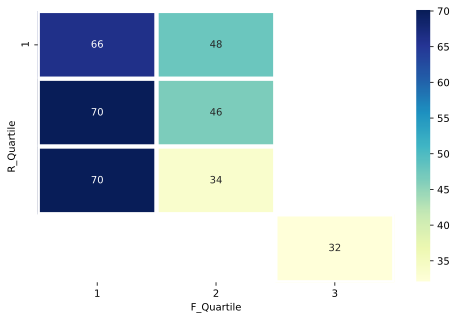

In [56]:
viz = rfm_segmentation.pivot_table(index='R_Quartile', 
                                   columns='F_Quartile', 
                                   values='monetary_value', 
                                   aggfunc=np.median)
sns.heatmap(viz, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".0f", 
            linewidths=4.15, 
            annot_kws={"size": 10},
            yticklabels=4)

- R - среднее время сдачи одного экзамена, 
- F - завершаемость курсов, 
- M - среднее количество баллов, получаемое за экзамен.

Посмотрим распределение студентов по классам:

In [57]:
rfm_segmentation['RFMClass'].value_counts().sort_values(ascending=False)

213    734
313    574
212    573
434    536
211    487
311    470
113    427
312    352
112    228
111    224
223     15
224      6
123      6
324      1
Name: RFMClass, dtype: int64